In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv('datasets/placement.csv')

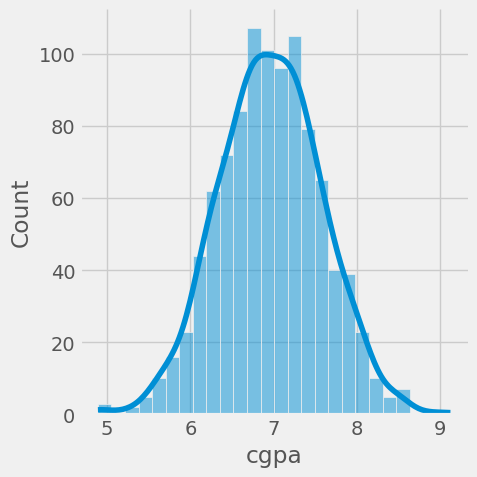

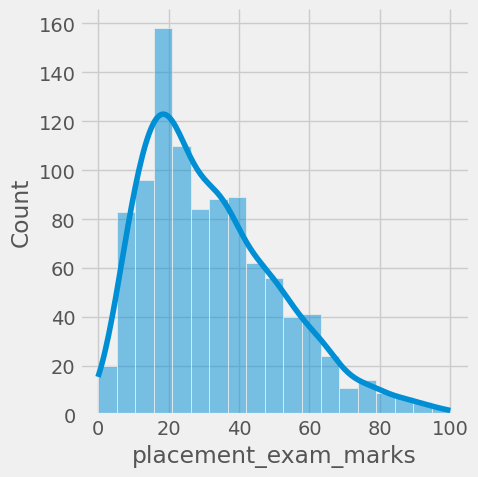

In [17]:
sns.displot(data=df,x=df['cgpa'], kde=True)
sns.displot(data=df,x=df['placement_exam_marks'], kde=True)

In [18]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

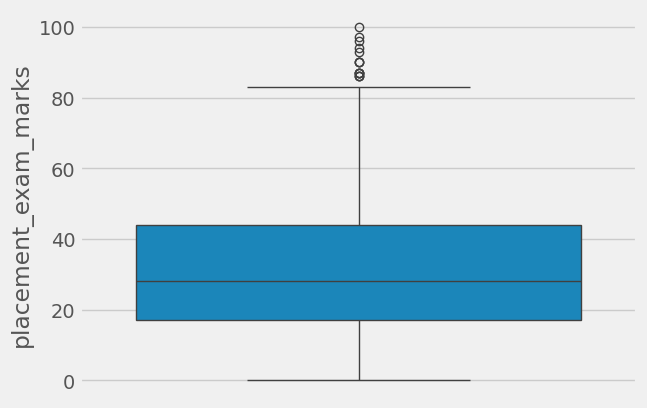

In [19]:
sns.boxplot(df['placement_exam_marks'])

In [20]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [21]:
iqr = percentile75 - percentile25

In [22]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Trimming

In [23]:
new_df1 = df[df['placement_exam_marks'] < upper_limit]
new_df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


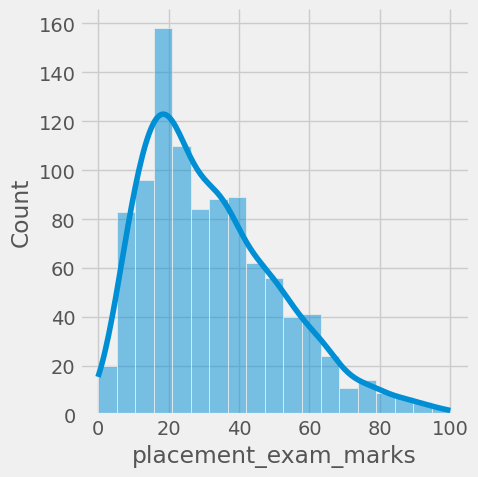

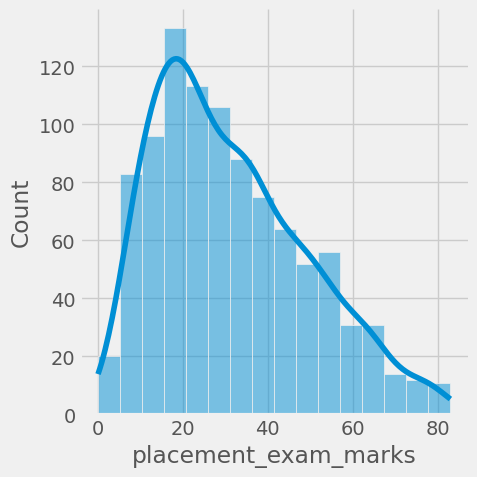

In [25]:

sns.displot(data=df, x=df['placement_exam_marks'], kde = True)

# sns.boxplot(data=df, x=df['placement_exam_marks'])

sns.displot(data = new_df1, x= new_df1['placement_exam_marks'], kde=True)

# sns.boxplot(data = new_df1, x= new_df1['placement_exam_marks'])



# Capping

In [26]:
new_df2 = df.copy()
new_df2['placement_exam_marks'] = np.where(
    new_df2['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df2['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df2['placement_exam_marks']
    )
)

In [27]:
new_df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


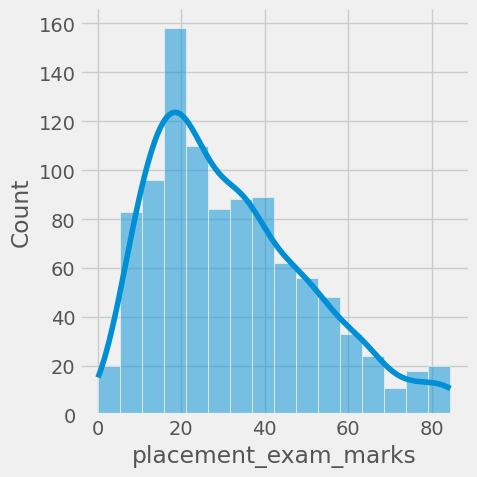

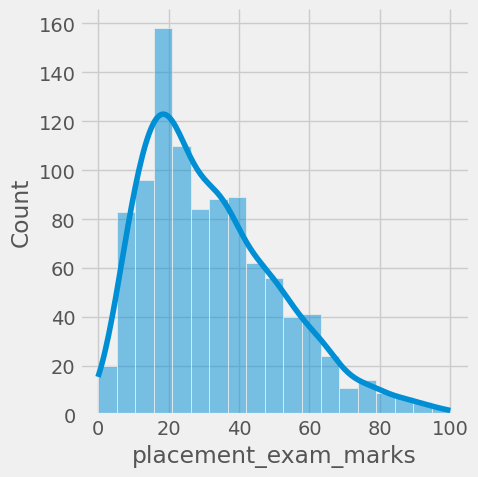

In [31]:
sns.displot(data=df, x = new_df2['placement_exam_marks'], kde=True)
sns.displot(data=df, x = df['placement_exam_marks'], kde=True)